https://github.com/foxtrotmike/PCA-Tutorial/blob/c26fa6270bfe0752bd1a7fe0ca876893c33e0088/pca.ipynb

Make data

In [4]:
import numpy as np
weights = np.array([73,95,72,69,76,82,95,89,89,83,94,89,103]) #in kg
heights = np.array([56,73,60,54,56,62,77,73,72,69,74,67,84,]) #in inches

Plot data

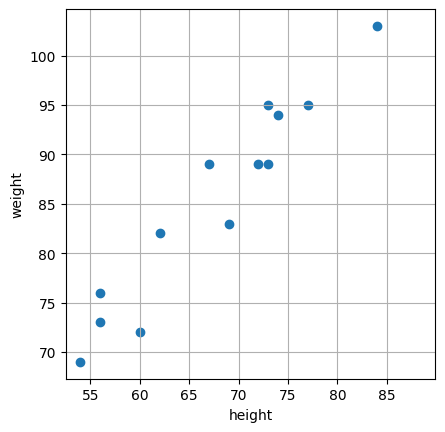

In [6]:
import matplotlib.pyplot as plt
plt.scatter(heights,weights)
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.grid()
plt.show()

Make covariance

In [8]:
X = np.vstack((heights,weights)).T # create data matrix
N, d = X.shape
print("The dimensions of X are", X.shape)
Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
Xv = np.var(X, axis=0)
print("The mean is", Xm)
print("The standard deviation is", Xs)
print("The variance is", Xv)

snapshot = False
if not snapshot:
    Cx = np.cov(X.T, bias=True)
else:
    Cx = np.cov(X, bias=True)

print("The co-variance matrix is\n", Cx)

The dimensions of X are (13, 2)
The mean is [67.46153846 85.30769231]
The standard deviation is [ 8.86319429 10.0566443 ]
The variance is [ 78.55621302 101.13609467]
The co-variance matrix is
 [[ 78.55621302  85.55029586]
 [ 85.55029586 101.13609467]]


Standardisation

In [10]:
Xn = (X-Xm)/Xs
print("Mean after normalisation", np.mean(Xn, axis=0))
print("Standard deviation after normalisation", np.std(Xn, axis=0))
print("Variance after normalisation", np.var(Xn, axis=0))
print("Total Variance after normalisation", np.sum(np.var(Xn, axis=0)))

Mean after normalisation [-6.31973106e-16  1.53723188e-16]
Standard deviation after normalisation [1. 1.]
Variance after normalisation [1. 1.]
Total Variance after normalisation 2.0


Plotting the standardised data

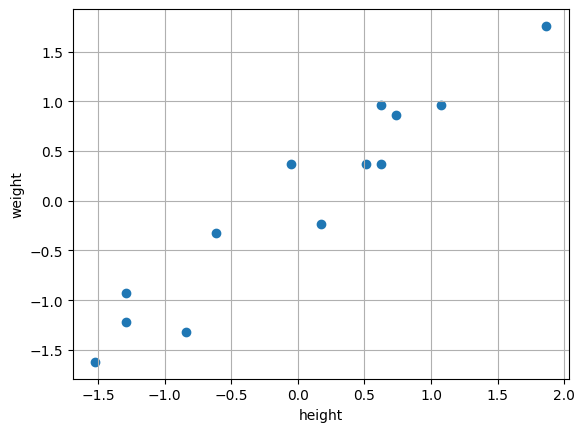

In [11]:
plt.scatter(Xn[:,0],Xn[:,1])
plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Covariance matrix

In [12]:
if not snapshot:
    C = np.cov(Xn.T, bias=True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)
else:
    C = np.cov(Xn, bias=True) # Determine NxN sized Cov. Matrix

print("Covariance matrix Dimensionality is: ", C.shape)
print("Covariance matrix is\n", C)

Covariance matrix Dimensionality is:  (2, 2)
Covariance matrix is
 [[1.         0.95979428]
 [0.95979428 1.        ]]


Covariance is high which implies it should be possible to reduce the dimesnions

The eigenvectors (principal components) are
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The variance captures along each PC [1.95979428 0.04020572]
The fraction of variance captures along each PC [0.97989714 1.        ]
The eigen values are [1.95979428 0.04020572]
The fraction of eigenvalues along each PC [0.97989714 1.        ]


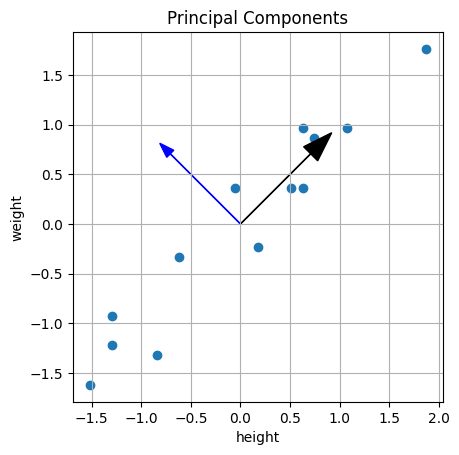

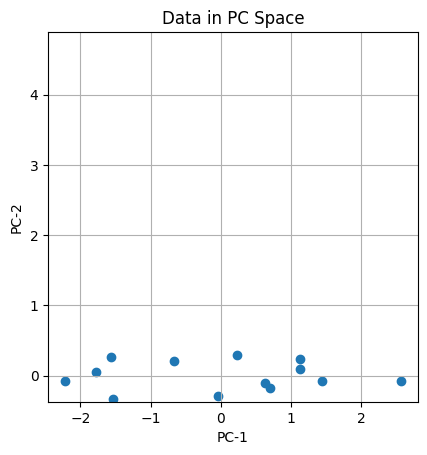

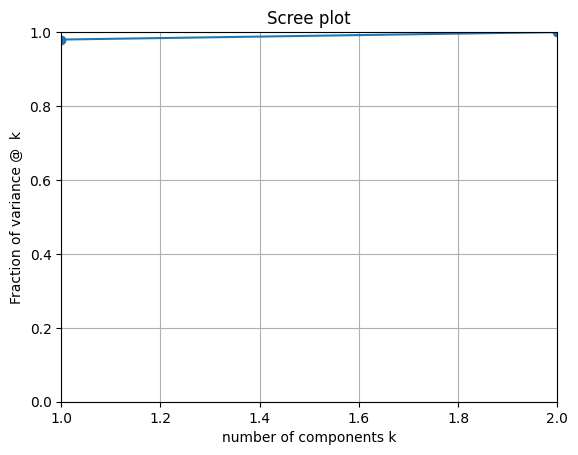

In [14]:
ev, pc = np.linalg.eig(C)
ev = np.abs(ev)

if snapshot:
    pc = np.dot(Xn.T, pc[:, :d])
    pc /= np.linalg.norm(pc, axis=0)
    pc = np.real(pc)

cvar = np.var(np.dot(Xn, pc), axis=0)
idx = np.argsort(-cvar)
cvar = cvar[idx]
pc = pc[:, idx]

print("The eigenvectors (principal components) are\n", pc)
print("The variance captures along each PC", cvar)
print("The fraction of variance captures along each PC", np.cumsum(ev)/np.sum(ev))
if not snapshot:
    ev = ev[idx]
    print("The eigen values are", ev)
    print("The fraction of eigenvalues along each PC", np.cumsum(ev)/np.sum(ev))

plt.scatter(Xn[:, 0], Xn[:, 1])
plt.arrow(0, 0, pc[0, 0], pc[1, 0], color='k', head_width=0.2)
plt.arrow(0, 0, pc[0, 1], pc[1, 1], color='b', head_width=0.1)
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.title("Principal Components")
plt.grid()
plt.show()

Z = np.dot(Xn, pc)
plt.scatter(Z[:, 0], Z[:, 1])
plt.axis('square')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title("Data in PC Space")
plt.grid()
plt.show()
#plotting the scree plot
plt.plot(np.arange(len(cvar))+1, np.cumsum(cvar)/np.sum(cvar), 'o-')
plt.axis([1, len(ev), 0, 1])
plt.xlabel("number of components k")
plt.ylabel("Fraction of variance @  k")
plt.grid()
plt.title("Scree plot")
plt.show()

In [15]:
pc1 = pc[:, 0]
pc2 = pc[:, 1]
print('Dot product of the first two principal components:', np.dot(pc1, pc2))
print('Norm of the first two principal components:', 
      np.linalg.norm(pc1), np.linalg.norm(pc1))

print("The principle component matrix multiple by its transpose:\n",
      np.dot(pc.T, pc))

Dot product of the first two principal components: -1.0146536357569526e-17
Norm of the first two principal components: 1.0 1.0
The principle component matrix multiple by its transpose:
 [[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]


In [16]:
k = 1 # number of components to keep
W = pc[:, 0:k] 
Z = np.dot(Xn, W)
print("Data after transformation\n", Z)
print("Standard deviation after transformation", np.std(Z, axis=0))
print("Variance after transformation", np.var(Z, axis=0))
print("Fraction of variance captured along the projections",
      np.var(Z, axis=0)/np.sum(np.var(Xn, axis=0)))

Data after transformation
 [[-1.77978638]
 [ 1.12334857]
 [-1.53097826]
 [-2.22059623]
 [-1.56884918]
 [-0.66829402]
 [ 1.44246909]
 [ 0.70147418]
 [ 0.62169406]
 [-0.03952072]
 [ 1.1328163 ]
 [ 0.22279341]
 [ 2.56342918]]
Standard deviation after transformation [1.39992653]
Variance after transformation [1.95979428]
Fraction of variance captured along the projections [0.97989714]


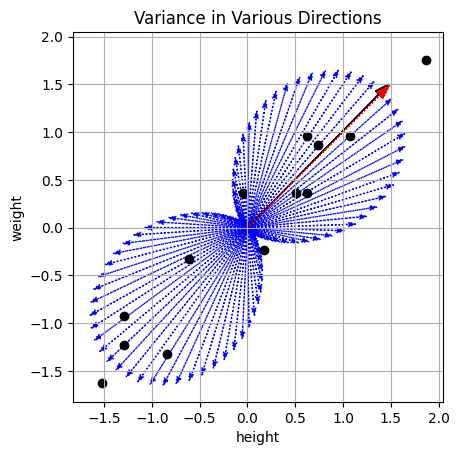

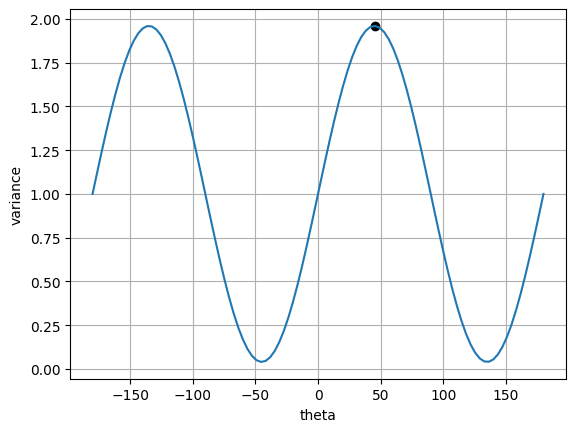

Maximum Variance 1.9596734664547109
Direction of Maximum Variance [0.7014748877063212, 0.7126941713788629]


In [18]:
import numpy as np
theta = (2 * np.linspace(0, 1, 100) - 1)* np.pi
vx = np.zeros(theta.shape[0])
maxv = 0
best_w = None
best_theta = 0
for i, t in enumerate(theta):
    wt = [np.cos(t), np.sin(t)]
    vx[i] = np.var(np.dot(wt, Xn.T))
    plt.arrow(0, 0, vx[i]*wt[0], vx[i]*wt[1], color='b',
              head_width=0.05, linestyle=':')
    if vx[i] > maxv:
        maxv = vx[i]
        best_w = wt
        best_theta = t
plt.scatter(Xn[:, 0], Xn[:, 1], color='k')
plt.arrow(0, 0, maxv*best_w[0], maxv*best_w[1], color='k', head_width=0.1)
plt.arrow(0, 0, cvar[0]*pc[0, 0] ,cvar[0]*pc[1, 0], color='r',
          head_width=0.1, linestyle=':')

plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.title("Variance in Various Directions")
plt.show()

plt.plot(theta*180/np.pi,vx)
plt.scatter(best_theta*180/np.pi, maxv, color='k')
plt.xlabel("theta")
plt.ylabel("variance")
plt.grid()
plt.show()
print("Maximum Variance", maxv)
print("Direction of Maximum Variance", best_w)

Inverse project

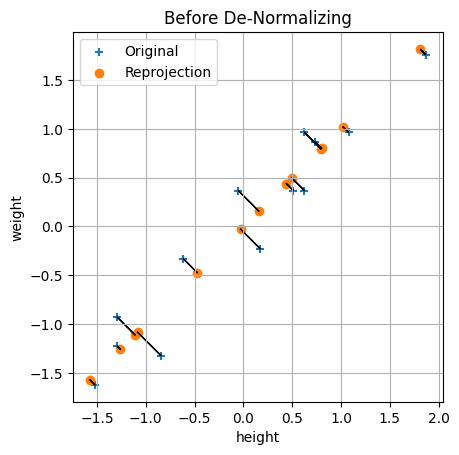

In [19]:
iW = W.T
Xr = np.dot(Z, iW)
plt.scatter(Xn[:, 0], Xn[:, 1], marker='+')
plt.scatter(Xr[:, 0], Xr[:, 1])
plt.legend(['Original', 'Reprojection'])
for x, xr in zip(Xn, Xr):    
    plt.arrow(x[0], x[1], xr[0]-x[0], xr[1]-x[1])
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('Before De-Normalizing')
plt.show()

In [21]:
print("Average Reconstruction Error over normalized data",
      np.mean(np.linalg.norm(np.dot(Z,iW)-Xn,axis=1)**2))
print("Difference between total variance and variance along projection",
      np.sum(np.var(Xn, axis=0))-np.sum(np.var(Z, axis=0)))


Average Reconstruction Error over normalized data 0.040205722006916675
Difference between total variance and variance along projection 0.040205722006916744
